Task: Customer Preference Analysis
Analyze the relationship between the type of cuisine and the restaurant's rating.
Identify the most popular cuisines among customers based on the number of votes.
Determine if there are any specific cuisines that tend to receive higher ratings.

1.Analyze the relationship between the type of cuisine and the restaurant's rating.

C:\Users\admin\AppData\Local\Temp\ipykernel_5956\3441270560.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate rating',y='Cuisines',data=combine_cuisisne,palette='coolwarm')


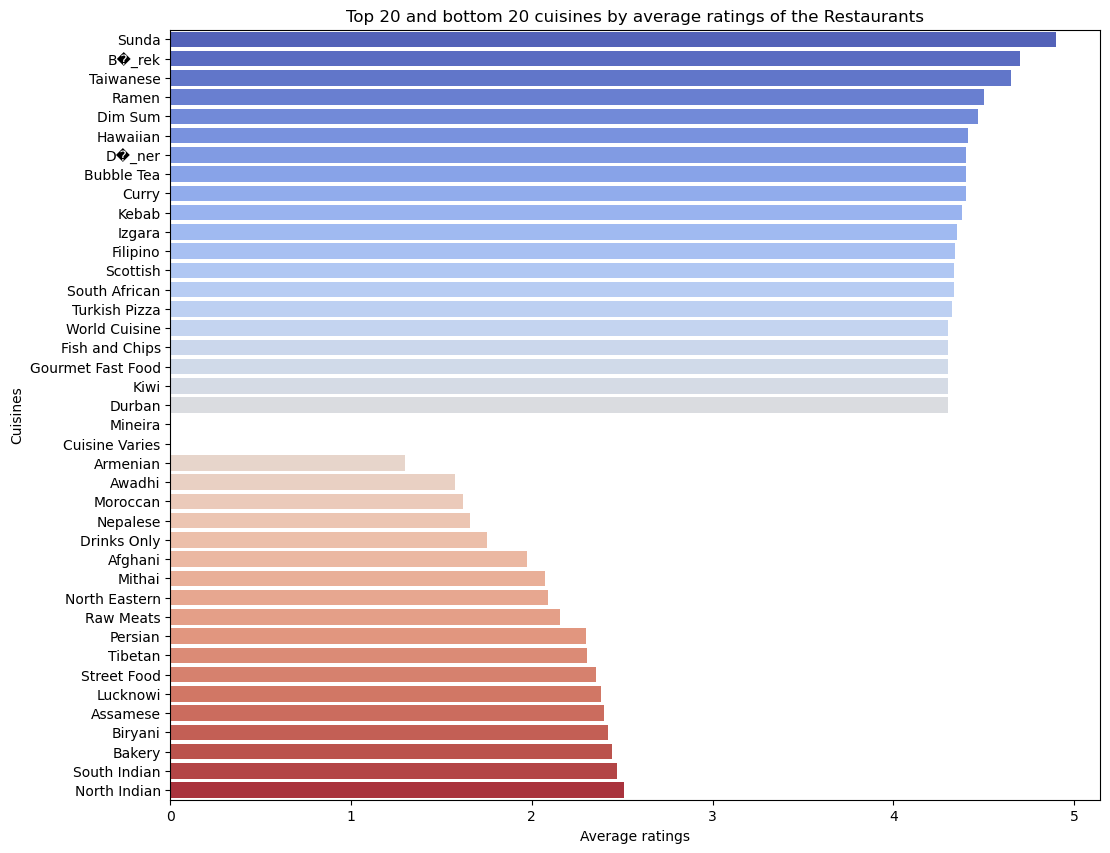

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Dataset .csv')
df=df.dropna(subset=['Cuisines','Aggregate rating'])

#As the cuisine column contains multiple cuisines in a single cell we have to split it
df['Cuisines'] = df['Cuisines'].astype(str).str.split(', ')

# Explode the Cuisines column to separate rows for multi-cuisine restaurants
df_exploded1 = df.explode('Cuisines')

#group by cuisine to calculate aggregate rating
cuisine_rating=df_exploded1.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
top_n=20
#sort ratings in descending order for top 20
cuisine_rating_sort=cuisine_rating.sort_values(by='Aggregate rating',ascending=False)
#sort ratings in ascending order for bottom 20
cuisine_rating_sort1=cuisine_rating.sort_values(by='Aggregate rating')
#most loved cuisines based on average ratings
top_cuisines=cuisine_rating_sort.head(top_n)
#least loved cuisines based on average ratings
bottom_cuisines=cuisine_rating_sort1.head(top_n)
#create a new dataframe for visualization
combine_cuisisne=pd.concat([top_cuisines,bottom_cuisines])
#plot the visualization for popular 20 and least popular 20 cuisines
plt.figure(figsize=(12,10))
sns.barplot(x='Aggregate rating',y='Cuisines',data=combine_cuisisne,palette='coolwarm')
plt.title('Top 20 and bottom 20 cuisines by average ratings of the Restaurants')
plt.xlabel('Average ratings')
plt.ylabel('Cuisines')
plt.show()

2. Identify the Most Popular Cuisines Based on the Number of Votes

C:\Users\admin\AppData\Local\Temp\ipykernel_5956\1670029063.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Votes', y='Cuisines', data=cuisine_votes_sorted, palette='magma')


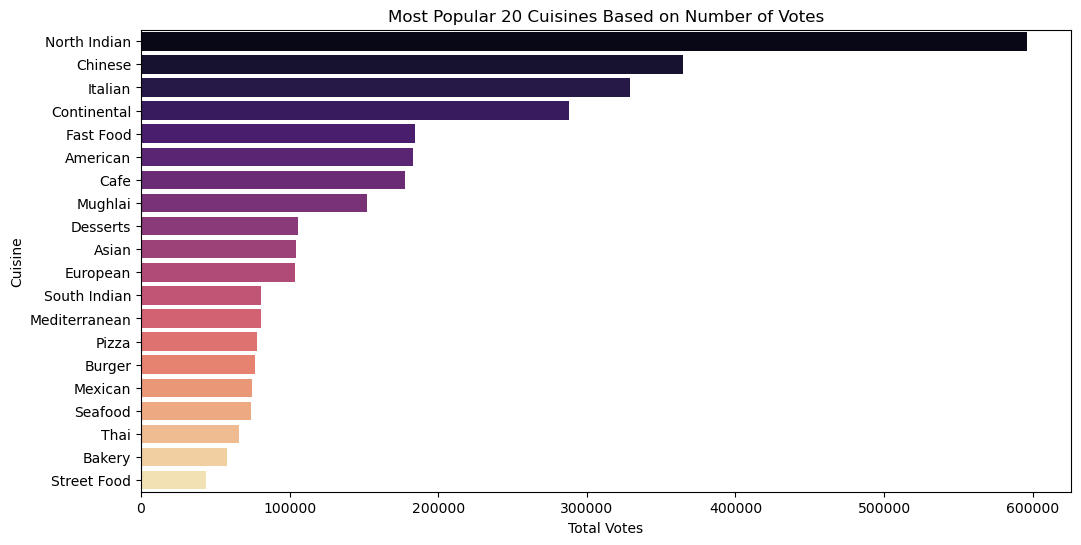

In [11]:
# Handle missing values
df['Cuisines'] = df['Cuisines'].fillna('')  

# split the cuisines as they include multiple entries
df['Cuisines'] = df['Cuisines'].astype(str).str.split(', ')

# Explode the Cuisines column to separate rows for multi-cuisine restaurants
df_exploded = df.explode('Cuisines')

# Group by cuisine and sum the votes
cuisine_votes = df_exploded.groupby('Cuisines')['Votes'].sum().reset_index()

# Sort by number of votes
cuisine_votes_sorted = cuisine_votes.sort_values(by='Votes', ascending=False).head(20)

# Visualize the most popular cuisines
plt.figure(figsize=(12, 6))
sns.barplot(x='Votes', y='Cuisines', data=cuisine_votes_sorted, palette='magma')
plt.title('Most Popular 20 Cuisines Based on Number of Votes')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine')
plt.show()

3. Determine If There Are Specific Cuisines That Tend to Receive Higher Ratings

C:\Users\admin\AppData\Local\Temp\ipykernel_5956\2593772314.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate rating',y='Cuisines',data=cuisine_ratings_sort,palette='viridis')


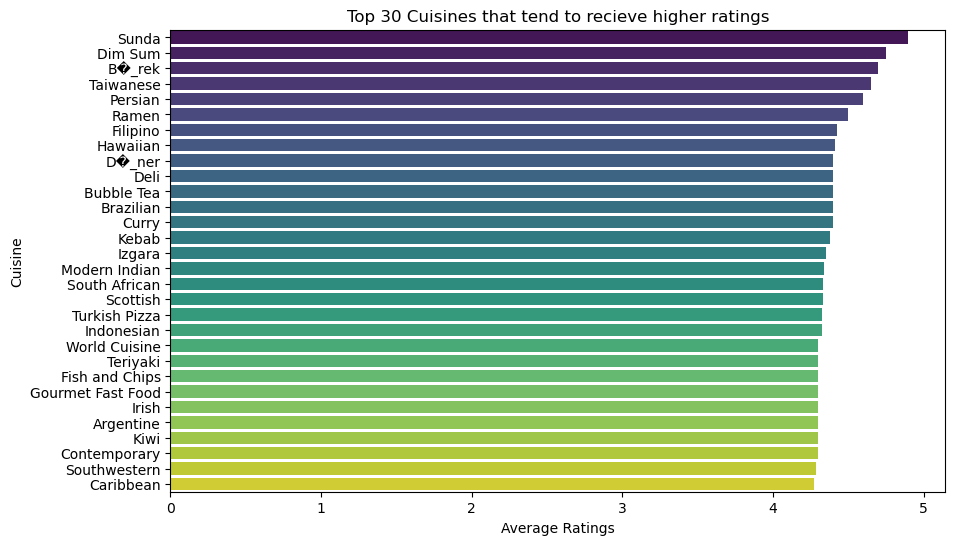

In [17]:
#filter out cuisines with certain number of votes
df_filtered=df_exploded[df_exploded['Votes']>50]
#groupby cuisines and calculate aggregate ratings
cuisine_ratings=df_filtered.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

#sort the cuisines in descending order
cuisine_ratings_sort=cuisine_ratings.sort_values(by='Aggregate rating',ascending=False).head(30)

#plot the visualization
plt.figure(figsize=(10,6))
sns.barplot(x='Aggregate rating',y='Cuisines',data=cuisine_ratings_sort,palette='viridis')
plt.title('Top 30 Cuisines that tend to recieve higher ratings')
plt.xlabel('Average Ratings')
plt.ylabel('Cuisine')
plt.show()